# Table of Contents
 <p><div class="lev1 toc-item"><a href="#DATA:" data-toc-modified-id="DATA:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>DATA:</a></div><div class="lev1 toc-item"><a href="#exploration" data-toc-modified-id="exploration-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>exploration</a></div><div class="lev2 toc-item"><a href="#plot-mass-shooting-vs-gdp-in-absolute-numbers,-and-per-person.-Show-the-errorbars-(y-errors)" data-toc-modified-id="plot-mass-shooting-vs-gdp-in-absolute-numbers,-and-per-person.-Show-the-errorbars-(y-errors)-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>plot mass shooting vs gdp in absolute numbers, and per person. Show the errorbars (y errors)</a></div><div class="lev2 toc-item"><a href="#plot-the-average-number-of-civilian-fire-arms-per-person" data-toc-modified-id="plot-the-average-number-of-civilian-fire-arms-per-person-22"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>plot the average number of civilian fire arms per person</a></div><div class="lev2 toc-item"><a href="#plot-the-average-number-of-homicide-by-fire-arms-per-person" data-toc-modified-id="plot-the-average-number-of-homicide-by-fire-arms-per-person-23"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>plot the average number of homicide by fire arms per person</a></div><div class="lev2 toc-item"><a href="#plot-the-number-of--homicides-by-fire-arm-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color" data-toc-modified-id="plot-the-number-of--homicides-by-fire-arm-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color-24"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>plot the number of  homicides by fire arm against the number of civilian firearms. plot the  US in a different color</a></div><div class="lev2 toc-item"><a href="#plot-the-number-of--mass-shootings-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color" data-toc-modified-id="plot-the-number-of--mass-shootings-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color-25"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>plot the number of  mass shootings against the number of civilian firearms. plot the  US in a different color</a></div><div class="lev1 toc-item"><a href="#Modeling" data-toc-modified-id="Modeling-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Modeling</a></div><div class="lev2 toc-item"><a href="#fit-a-line-to-the-Number-of-mass-shootings--per-person-as-a-function-of-Average-total-all-civilian-firearms-per-person." data-toc-modified-id="fit-a-line-to-the-Number-of-mass-shootings--per-person-as-a-function-of-Average-total-all-civilian-firearms-per-person.-31"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>fit a line to the Number of mass shootings  per person as a function of Average total all civilian firearms per person.</a></div><div class="lev2 toc-item"><a href="#Outlier-removal:" data-toc-modified-id="Outlier-removal:-32"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Outlier removal:</a></div><div class="lev2 toc-item"><a href="#Extra-credit:-calculate-the-confidence-interval-by-hand-and-also-plot-them" data-toc-modified-id="Extra-credit:-calculate-the-confidence-interval-by-hand-and-also-plot-them-33"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Extra credit: calculate the confidence interval by hand and also plot them</a></div><div class="lev2 toc-item"><a href="#Use-the-stsatsmodels.gaphics-package-to-plot-the-influence-plot." data-toc-modified-id="Use-the-stsatsmodels.gaphics-package-to-plot-the-influence-plot.-34"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Use the stsatsmodels.gaphics package to plot the influence plot.</a></div><div class="lev2 toc-item"><a href="#Extra-credit:-calculate-from-scratch-the-stanrdardized-residuals-and-the-H-leverage-for-the-WLS-model-and-discuss-if-there-are-any-differences" data-toc-modified-id="Extra-credit:-calculate-from-scratch-the-stanrdardized-residuals-and-the-H-leverage-for-the-WLS-model-and-discuss-if-there-are-any-differences-35"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Extra credit: calculate from scratch the stanrdardized residuals and the H leverage for the WLS model and discuss if there are any differences</a></div><div class="lev2 toc-item"><a href="#Discuss-your-findings" data-toc-modified-id="Discuss-your-findings-36"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Discuss your findings</a></div>

**regression exercise**

**written by Federica B Bianco CUSP 2017**

**for PUI lecture on models and linear regression**

**investigate linear relationships between fire arm possession, homicides by fire arms, and mass shootings for different countries, considering also the country GDP**

# DATA: 

The Guardian firearms murders and ownership data. The relevans sheet is uploaded in the github repository as a csv file. Download it from there. Note: this dataset is from 2012.

**Extra credit**: download directly from google docs with a google API

https://docs.google.com/spreadsheets/d/1chqUZHuY6cXYrRYkuE0uwXisGaYvr7durZHJhpLGycs/edit#gid=0

Number of mass shootings: find the link here https://datawrapper.dwcdn.net/pvLFI/4/

The world population by country find the download link here :
https://data.worldbank.org/indicator/SP.POP.TOTL

Remember that all read or downloads have to me reproducible.

Merge all datasets. After throwing away the irrelevant data it should look something like this (I renamed the GDP and the population as gdp" and "pop")

Throughout, when I ask you to include errors in plots or models, use Poisson statistics: the error is the square root of the number you are considering (e.g. this country has N fire arms +/- square root of N, or this country has Np [= N/population +/- (square root of N) / population] fire arms per person).

In [2]:
# Extra Credict: download directly from google docs with a google API
# I created a Virtual environment in ADRF frist and then I installed the Google APIs Client Library for Python
from __future__ import print_function

#from apiclient import discovery
from oauth2client import client
from oauth2client import tools
from oauth2client.file import Storage
from apiclient.http import MediaIoBaseDownload
from apiclient.discovery import build
from oauth2client.client import OAuth2WebServerFlow


import io
import httplib2
import os

In [10]:
def downloadFile(file_id,filepath):
    request = drive_service.files().get_media(fileId=file_id)
    fh = io.BytesIO()
    downloader = MediaIoBaseDownload(fh, request)
    done = False
    while done is False:
        status, done = downloader.next_chunk()
       # print "Download %d%%." % int(status.progress() * 100)
    with io.open(filepath,"wb") as f:
        fh.seek(0)
        f.write(fh.read())

In [11]:
downloadFile('1ZdR3L3qP4Bkq8noWLJHSr_iBau0DNT4Kli4SxNc2YEo','World firearms murders and ownership.csv')

NameError: global name 'drive_service' is not defined

In [191]:
import pandas as pd
import os
import pandas as pd
import pylab as pl
import urllib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.api import abline_plot
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['scatter']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [50]:
w = pd.read_csv("PUI2018_fb55" + "/" + "HW9_fb55"+ "/"+ 'World firearms murders and ownership - Sheet 1.csv')

In [51]:
w.head(10)

,Country/Territory,ISO code,Source,% of homicides by firearm,Number of homicides by firearm,"Homicide by firearm rate per 100,000 pop",Rank by rate of ownership,Average firearms per 100 people,Average total all civilian firearms
0,Albania,AL,CTS,65.9,56.0,1.76,70.0,8.6,270000.0
1,Algeria,DZ,CTS,4.8,20.0,0.06,78.0,7.6,1900000.0
2,Angola,AO,NaN,NaN,NaN,NaN,34.0,17.3,2800000.0
3,Anguilla,AI,WHO-MDB,24.0,1.0,7.14,NaN,NaN,NaN
4,Argentina,AR,Ministry of Justice,52.0,1198.0,3.02,62.0,10.2,3950000.0
5,Armenia,AM,CTS,13.0,9.0,0.29,52.0,12.5,380000.0
6,Australia,AU,NSO,11.5,30.0,0.14,42.0,15.0,3050000.0
7,Austria,AT,CTS,29.5,18.0,0.22,14.0,30.4,2500000.0
8,Azerbaijan,AZ,CTS,6.5,11.0,0.12,115.0,3.5,290000.0
9,Bahamas,BS,CTS,61.2,52.0,15.37,98.0,5.3,17000.0


In [52]:
#Number of mass shootings
ms = pd.read_csv(os.getenv("PUIDATA") + "/" + 'Number of mass shootings.csv')

In [53]:
ms.head()

,Country,Guns per 100 inhabitants,Number of mass shootings (1983-2013)
0,Australia,15.0,4
1,Austria,30.4,1
2,Belgium,17.2,2
3,Canada,30.8,4
4,Denmark,12.0,0


In [54]:
import zipfile
zip_ref = zipfile.ZipFile( os.getenv("PUIDATA") + "/" +"API_SP.POP.TOTL_DS2_en_csv_v2_10203548.zip", 'r')
zip_ref.extractall( os.getenv("PUIDATA") )
zip_ref.close()

In [55]:
!ls $PUIDATA

201501-citibike-tripdata.csv
201501-citibike-tripdata.zip
201506-citibike-tripdata.csv
201506-citibike-tripdata.zip
201601-citibike-tripdata.csv
201601-citibike-tripdata.csv.zip
201601-citibike-tripdata.zip
201602-citibike-tripdata.csv
201602-citibike-tripdata.zip
201606-citibike-tripdata.csv
201606-citibike-tripdata.zip
201801JC-201801-citibike-tripdata.csv.zip
ACS_16_1YR_GCT2801.ST50_metadata.csv
ACS_16_1YR_GCT2801.ST50.txt
ACS_16_1YR_GCT2801.ST50_with_ann.csv
ACS_16_1YR_GCT2801.ST50.zip
aff_download_readme_ann.txt
API_NY.GDP.MKTP.CD_DS2_en_csv_v2_10203569.csv
API_SP.POP.TOTL_DS2_en_csv_v2_10203548.csv
API_SP.POP.TOTL_DS2_en_csv_v2_10203548.zip
city_racks_2013_06_28.dbf
city_racks_2013_06_28.prj
city_racks_2013_06_28.sbn
city_racks_2013_06_28.sbx
city_racks_2013_06_28.shp
city_racks_2013_06_28.shp.xml
city_racks_2013_06_28.shx
cityracks.zip
data.csv
dshstreet.csv
geo_export_27f6bb5f-73a6-4fdd-8865-99a7575072b4.dbf
geo_export_27f6bb5f-73a6-4fdd-8865-99a7575072b4.prj
geo_export_27f6bb5

In [91]:
#The world population by country 
po = pd.read_csv(os.getenv("PUIDATA") + "/" + 'API_SP.POP.TOTL_DS2_en_csv_v2_10203548.csv')

In [92]:
po.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,105264.0,NaN
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,...,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,35530081.0,NaN
2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,...,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,29784193.0,NaN
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0,NaN
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,76965.0,NaN


In [73]:
#Download GDP DATA
!wget http://api.worldbank.org/v2/en/indicator/NY.GDP.MKTP.CD?downloadformat=csv -O world_gdp.zip

--2018-11-13 23:22:05--  http://api.worldbank.org/v2/en/indicator/NY.GDP.MKTP.CD?downloadformat=csv
Resolving api.worldbank.org (api.worldbank.org)... 52.202.62.171
Connecting to api.worldbank.org (api.worldbank.org)|52.202.62.171|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 116071 (113K) [application/zip]
Saving to: ‘world_gdp.zip’

world_gdp.zip       100%[===================>] 113.35K  --.-KB/s    in 0.02s   

2018-11-13 23:22:05 (5.46 MB/s) - ‘world_gdp.zip’ saved [116071/116071]



In [74]:
!mv world_gdp.zip $PUIDATA

In [75]:
!ls $PUIDATA

201501-citibike-tripdata.csv
201501-citibike-tripdata.zip
201506-citibike-tripdata.csv
201506-citibike-tripdata.zip
201601-citibike-tripdata.csv
201601-citibike-tripdata.csv.zip
201601-citibike-tripdata.zip
201602-citibike-tripdata.csv
201602-citibike-tripdata.zip
201606-citibike-tripdata.csv
201606-citibike-tripdata.zip
201801JC-201801-citibike-tripdata.csv.zip
ACS_16_1YR_GCT2801.ST50_metadata.csv
ACS_16_1YR_GCT2801.ST50.txt
ACS_16_1YR_GCT2801.ST50_with_ann.csv
ACS_16_1YR_GCT2801.ST50.zip
aff_download_readme_ann.txt
API_NY.GDP.MKTP.CD_DS2_en_csv_v2_10203569.csv
API_SP.POP.TOTL_DS2_en_csv_v2_10203548.csv
API_SP.POP.TOTL_DS2_en_csv_v2_10203548.zip
city_racks_2013_06_28.dbf
city_racks_2013_06_28.prj
city_racks_2013_06_28.sbn
city_racks_2013_06_28.sbx
city_racks_2013_06_28.shp
city_racks_2013_06_28.shp.xml
city_racks_2013_06_28.shx
cityracks.zip
data.csv
dshstreet.csv
geo_export_27f6bb5f-73a6-4fdd-8865-99a7575072b4.dbf
geo_export_27f6bb5f-73a6-4fdd-8865-99a7575072b4.prj
geo_export_27f6bb5

In [76]:
import zipfile
zip_ref = zipfile.ZipFile( os.getenv("PUIDATA") + "/" +"world_gdp.zip", 'r')
zip_ref.extractall( os.getenv("PUIDATA") )
zip_ref.close()

In [77]:
!ls $PUIDATA

201501-citibike-tripdata.csv
201501-citibike-tripdata.zip
201506-citibike-tripdata.csv
201506-citibike-tripdata.zip
201601-citibike-tripdata.csv
201601-citibike-tripdata.csv.zip
201601-citibike-tripdata.zip
201602-citibike-tripdata.csv
201602-citibike-tripdata.zip
201606-citibike-tripdata.csv
201606-citibike-tripdata.zip
201801JC-201801-citibike-tripdata.csv.zip
ACS_16_1YR_GCT2801.ST50_metadata.csv
ACS_16_1YR_GCT2801.ST50.txt
ACS_16_1YR_GCT2801.ST50_with_ann.csv
ACS_16_1YR_GCT2801.ST50.zip
aff_download_readme_ann.txt
API_NY.GDP.MKTP.CD_DS2_en_csv_v2_10203569.csv
API_SP.POP.TOTL_DS2_en_csv_v2_10203548.csv
API_SP.POP.TOTL_DS2_en_csv_v2_10203548.zip
city_racks_2013_06_28.dbf
city_racks_2013_06_28.prj
city_racks_2013_06_28.sbn
city_racks_2013_06_28.sbx
city_racks_2013_06_28.shp
city_racks_2013_06_28.shp.xml
city_racks_2013_06_28.shx
cityracks.zip
data.csv
dshstreet.csv
geo_export_27f6bb5f-73a6-4fdd-8865-99a7575072b4.dbf
geo_export_27f6bb5f-73a6-4fdd-8865-99a7575072b4.prj
geo_export_27f6bb5

In [79]:
gdp= pd.read_csv(os.getenv("PUIDATA") + "/" + 'API_NY.GDP.MKTP.CD_DS2_en_csv_v2_10203569.csv')

In [80]:
gdp.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.498933e+09,2.467704e+09,2.584464e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,...,1.248694e+10,1.593680e+10,1.793024e+10,2.053654e+10,2.026425e+10,2.061610e+10,1.921556e+10,1.946902e+10,2.081530e+10,NaN
2,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,7.549239e+10,8.252614e+10,1.041158e+11,1.139232e+11,1.249125e+11,1.267302e+11,1.026212e+11,9.533720e+10,1.242094e+11,NaN
3,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.204421e+10,1.192695e+10,1.289087e+10,1.231978e+10,1.277628e+10,1.322824e+10,1.138693e+10,1.188368e+10,1.303935e+10,NaN
4,Andorra,AND,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,3.660531e+09,3.355695e+09,3.442063e+09,3.164615e+09,3.281585e+09,3.350736e+09,2.811489e+09,2.877312e+09,3.012914e+09,NaN


In [66]:
w.columns

Index([u'Country/Territory', u'ISO code', u'Source',
       u'% of homicides by firearm', u'Number of homicides by firearm',
       u'Homicide by firearm rate per 100,000 pop',
       u'Rank by rate of ownership', u'Average firearms per 100 people',
       u'Average total all civilian firearms'],
      dtype='object')

In [67]:
ms.columns

Index([u'Country', u'Guns per 100 inhabitants',
       u'Number of mass shootings (1983-2013)'],
      dtype='object')

In [115]:
ms.head()

,Country,Guns per 100 inhabitants,Number of mass shootings (1983-2013)
0,Australia,15.0,4
1,Austria,30.4,1
2,Belgium,17.2,2
3,Canada,30.8,4
4,Denmark,12.0,0


In [68]:
po.columns

Index([u'Country Name', u'Country Code', u'Indicator Name', u'Indicator Code',
       u'1960', u'1961', u'1962', u'1963', u'1964', u'1965', u'1966', u'1967',
       u'1968', u'1969', u'1970', u'1971', u'1972', u'1973', u'1974', u'1975',
       u'1976', u'1977', u'1978', u'1979', u'1980', u'1981', u'1982', u'1983',
       u'1984', u'1985', u'1986', u'1987', u'1988', u'1989', u'1990', u'1991',
       u'1992', u'1993', u'1994', u'1995', u'1996', u'1997', u'1998', u'1999',
       u'2000', u'2001', u'2002', u'2003', u'2004', u'2005', u'2006', u'2007',
       u'2008', u'2009', u'2010', u'2011', u'2012', u'2013', u'2014', u'2015',
       u'2016', u'2017', u'Unnamed: 62'],
      dtype='object')

In [81]:
gdp.columns

Index([u'Country Name', u'Country Code', u'Indicator Name', u'Indicator Code',
       u'1960', u'1961', u'1962', u'1963', u'1964', u'1965', u'1966', u'1967',
       u'1968', u'1969', u'1970', u'1971', u'1972', u'1973', u'1974', u'1975',
       u'1976', u'1977', u'1978', u'1979', u'1980', u'1981', u'1982', u'1983',
       u'1984', u'1985', u'1986', u'1987', u'1988', u'1989', u'1990', u'1991',
       u'1992', u'1993', u'1994', u'1995', u'1996', u'1997', u'1998', u'1999',
       u'2000', u'2001', u'2002', u'2003', u'2004', u'2005', u'2006', u'2007',
       u'2008', u'2009', u'2010', u'2011', u'2012', u'2013', u'2014', u'2015',
       u'2016', u'2017', u'Unnamed: 62'],
      dtype='object')

In [93]:
w = w.drop(labels= [u'ISO code', u'Source',
       u'% of homicides by firearm',
       u'Homicide by firearm rate per 100,000 pop',
       u'Rank by rate of ownership', u'Average firearms per 100 people'], axis=1)

In [108]:
w.rename(columns={'Country/Territory':'Country Name'},inplace=True)

In [109]:
w.head()

,Country Name,Number of homicides by firearm,Average total all civilian firearms
0,Albania,56.0,270000.0
1,Algeria,20.0,1900000.0
2,Angola,NaN,2800000.0
3,Anguilla,1.0,NaN
4,Argentina,1198.0,3950000.0


In [99]:
po = po.drop(labels=['Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011',  '2013',
       '2014', '2015', '2016', '2017', 'Unnamed: 62'], axis=1)

In [100]:
po.rename(columns={'2012':'pop'},inplace=True)

In [101]:
po.head()

,Country Name,pop
0,Aruba,102577.0
1,Afghanistan,30696958.0
2,Angola,25096150.0
3,Albania,2900401.0
4,Andorra,82431.0


In [85]:
gdp = gdp.drop(labels=['Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011',  '2013',
       '2014', '2015', '2016', '2017', 'Unnamed: 62'], axis=1)

In [87]:
gdp.rename(columns={'2012':'gdp'},inplace=True)

In [102]:
gdp.head()

,Country Name,gdp
0,Aruba,NaN
1,Afghanistan,2.053654e+10
2,Angola,1.139232e+11
3,Albania,1.231978e+10
4,Andorra,3.164615e+09


In [103]:
gdppo = pd.merge(po, gdp, how='inner', on='Country Name')

In [104]:
gdppo.head()

,Country Name,pop,gdp
0,Aruba,102577.0,NaN
1,Afghanistan,30696958.0,2.053654e+10
2,Angola,25096150.0,1.139232e+11
3,Albania,2900401.0,1.231978e+10
4,Andorra,82431.0,3.164615e+09


In [110]:
gdppow = pd.merge(gdppo,w, how='inner', on='Country Name')

In [111]:
gdppow.head()

,Country Name,pop,gdp,Number of homicides by firearm,Average total all civilian firearms
0,Angola,25096150.0,1.139232e+11,NaN,2800000.0
1,Albania,2900401.0,1.231978e+10,56.0,270000.0
2,United Arab Emirates,8900453.0,3.745906e+11,NaN,1000000.0
3,Argentina,42096739.0,5.459824e+11,1198.0,3950000.0
4,Armenia,2881922.0,1.061932e+10,9.0,380000.0


In [116]:
df_= pd.merge(gdppow, ms, right_on="Country", left_on="Country Name")
df_.head()

,Country Name,pop,gdp,Number of homicides by firearm,Average total all civilian firearms,Country,Guns per 100 inhabitants,Number of mass shootings (1983-2013)
0,Australia,22742475.0,1.543411e+12,30.0,3050000.0,Australia,15.0,4
1,Austria,8429991.0,4.094252e+11,18.0,2500000.0,Austria,30.4,1
2,Belgium,11128246.0,4.978842e+11,70.0,1800000.0,Belgium,17.2,2
3,Canada,34750545.0,1.824289e+12,173.0,9950000.0,Canada,30.8,4
4,Switzerland,7996861.0,6.680436e+11,57.0,3400000.0,Switzerland,45.7,2


In [123]:
df_.rename(columns={'Number of mass shootings (1983-2013)':'Number of mass shootings'},inplace=True)

# exploration

## plot mass shooting vs gdp in absolute numbers, and per person. Show the errorbars (y errors)

Use Poisson statistics for the errorbars on the number of mass shootings (optional: include errors on the population, also as Poisson statistics)

Are there any points that look like they may be outilers?


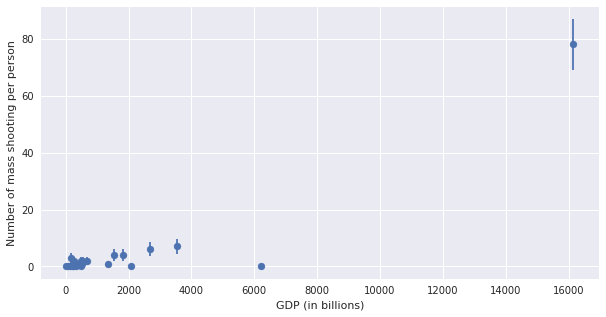

Number of mass shooting vs GDP, errors represent Poisson statistics.
The datapoint to the top right of the plot is the USA, which has noth the highest GDP and the highest number of mass shootings


In [137]:
# plot mass shooting vs gdp in absolute numbers
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_.gdp / 1e9, df_['Number of mass shootings'])
ax.errorbar(df_.gdp / 1e9, df_['Number of mass shootings'], 
            yerr = np.sqrt(df_['Number of mass shootings'] * 1.0), fmt = '.')
ax.set_xlabel("GDP (in billions)")
ax.set_ylabel("Number of mass shooting per person")
ax.set_ylim()
pl.show()
print ("Number of mass shooting vs GDP, " + 
       "errors represent Poisson statistics.\n" + 
       "The datapoint to the top right of the plot is the USA, " + 
       "which has noth the highest GDP and the highest number of mass shootings")


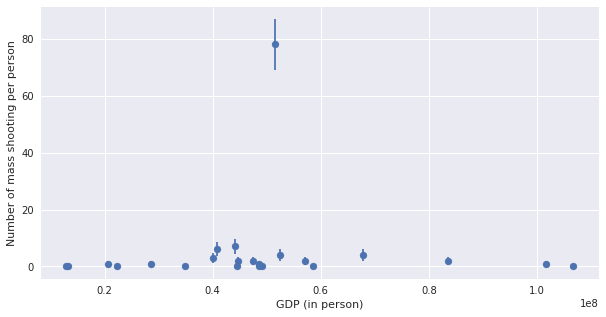

Number of mass shooting vs GDP in per person, errors represent Poisson statistics.



In [264]:
# plot mass shooting vs gdp in per person
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_["gdp"] / df_["pop"]*1e3, df_['Number of mass shootings'])
ax.errorbar(df_["gdp"] / df_["pop"]*1e3, df_['Number of mass shootings'], 
            yerr = np.sqrt(df_['Number of mass shootings'] * 1.0), fmt = '.')
ax.set_xlabel("GDP (in person)")
ax.set_ylabel("Number of mass shooting per person")
ax.set_ylim()
pl.show()
print ("Number of mass shooting vs GDP in per person, " + 
       "errors represent Poisson statistics.\n" )

## plot the average number of civilian fire arms per person
first without errors, then with errors. are there  points that look like outliers?

In [141]:
df_['firearm'] = df_["Average total all civilian firearms"] / df_['pop'] * 1e3

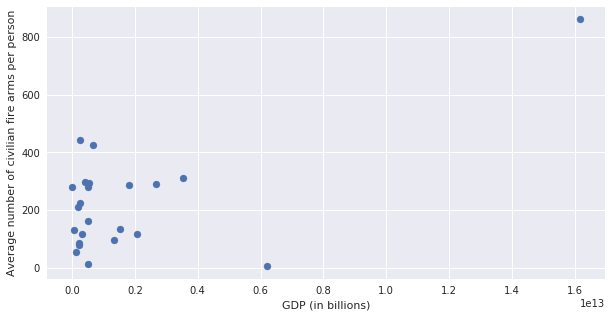

average number of civilian fire arms per person vs GDP, errors represent Poisson statistics.
The datapoint to the top right of the plot is the USA, which has noth the highest GDP and the highest Average number of civilian fire arms per person


In [262]:
# Without error
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_['gdp'],df_['firearm'])

ax.set_xlabel("GDP (in billions)")
ax.set_ylabel("Average number of civilian fire arms per person")
ax.set_ylim()
pl.show()
print ("average number of civilian fire arms per person vs GDP, " + 
       "errors represent Poisson statistics.\n" + 
       "The datapoint to the top right of the plot is the USA, " + 
       "which has noth the highest GDP and the highest Average number of civilian fire arms per person")

In [ ]:
# with errors

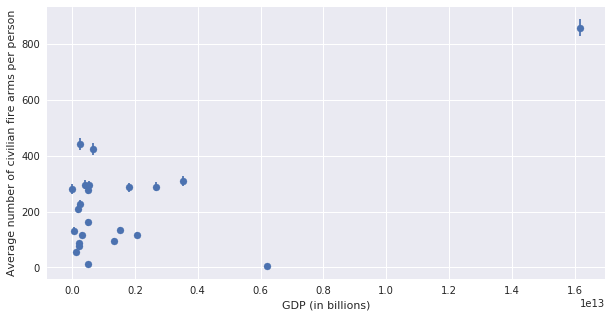

average number of civilian fire arms per person vs GDP, errors represent Poisson statistics.
The datapoint to the top right of the plot is the USA, which has noth the highest GDP and the highest number of mass shootings


In [143]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_['gdp'],df_['firearm'])
ax.errorbar(df_["gdp"] ,df_['firearm'], 
            yerr = np.sqrt(df_['firearm'] * 1.0), fmt = '.')
ax.set_xlabel("GDP (in billions)")
ax.set_ylabel("Average number of civilian fire arms per person")
ax.set_ylim()
pl.show()
print ("average number of civilian fire arms per person vs GDP, " + 
       "errors represent Poisson statistics.\n" + 
       "The datapoint to the top right of the plot is the USA, " + 
       "which has noth the highest GDP and the highest number of mass shootings")

## plot the average number of homicide by fire arms per person
first as a histogram

then against the country GDP, with statistical errors. are there  points that look like outliers?

In [144]:
df_['hofirearm'] = df_["Number of homicides by firearm"] / df_['pop'] * 1e3

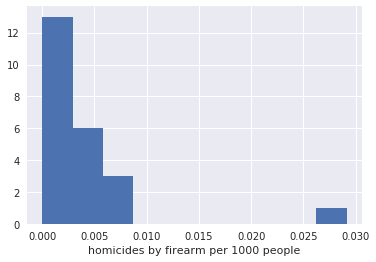

In [145]:
fig, ax = plt.subplots()
ax.hist(df_['Number of homicides by firearm'] / df_['pop'] * 1000)
ax.set_xlabel('homicides by firearm per 1000 people');


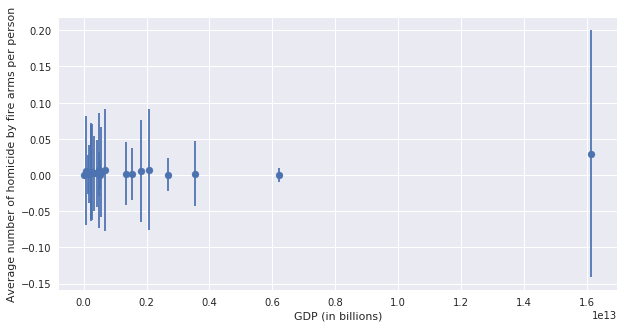

Average number of homicide by fire arms per person vs GDP, errors represent Poisson statistics.
The datapoint to the top right of the plot is the USA, which has noth the highest GDP and the highest number of mass shootings


In [147]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_['gdp'],df_['hofirearm'])
ax.errorbar(df_["gdp"] ,df_['hofirearm'], 
            yerr = np.sqrt(df_['hofirearm'] * 1.0), fmt = '.')
ax.set_xlabel("GDP (in billions)")
ax.set_ylabel("Average number of homicide by fire arms per person")
ax.set_ylim()
pl.show()
print ("Average number of homicide by fire arms per person vs GDP, " + 
       "errors represent Poisson statistics.\n" + 
       "The datapoint to the top right of the plot is the USA, " + 
       "which has noth the highest GDP and the highest number of mass shootings")

## plot the number of  homicides by fire arm against the number of civilian firearms. plot the  US in a different color
with and without errorbars


In [164]:
df_USA = df_[df_['Country Name'] == 'United States']

In [165]:
df_USA.head()

,Country Name,pop,gdp,Number of homicides by firearm,Average total all civilian firearms,Country,Guns per 100 inhabitants,Number of mass shootings,shootingspp,firearm,hofirearm
22,United States,313993272.0,1.615526e+13,9146.0,270000000.0,United States,88.8,78,0.000248,859.891036,0.029128


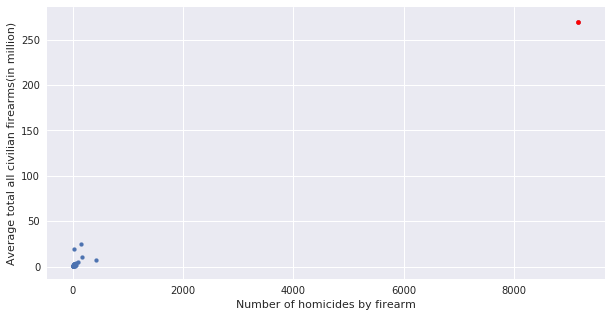

In [173]:
#without errors
fig = plt.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_['Number of homicides by firearm'], df_['Average total all civilian firearms']/ 1e6,s=15)
scatter = ax.scatter(df_USA['Number of homicides by firearm'], df_USA['Average total all civilian firearms']/ 1e6, s=20, c="red")

plt.xlabel("Number of homicides by firearm")
plt.ylabel("Average total all civilian firearms(in million)")
plt.show()

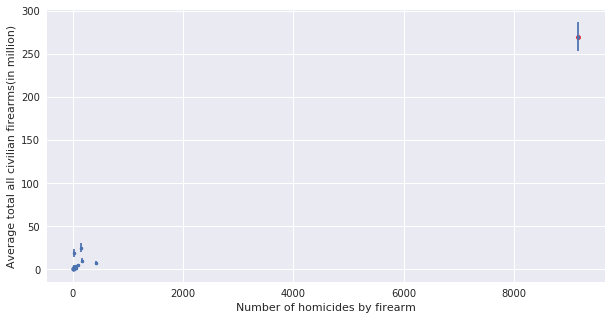

In [178]:
#with errors
fig = plt.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_['Number of homicides by firearm'], df_['Average total all civilian firearms']/ 1e6,s=8)
scatter = ax.scatter(df_USA['Number of homicides by firearm'], df_USA['Average total all civilian firearms']/ 1e6, s=20, c="red")
ax.errorbar(df_['Number of homicides by firearm'], df_['Average total all civilian firearms']/ 1e6, 
            yerr = np.sqrt(df_['Average total all civilian firearms'] / 1e6), fmt = '.')

plt.xlabel("Number of homicides by firearm")
plt.ylabel("Average total all civilian firearms(in million)")
plt.show()

## plot the number of  mass shootings against the number of civilian firearms. plot the  US in a different color
with and without errorbars


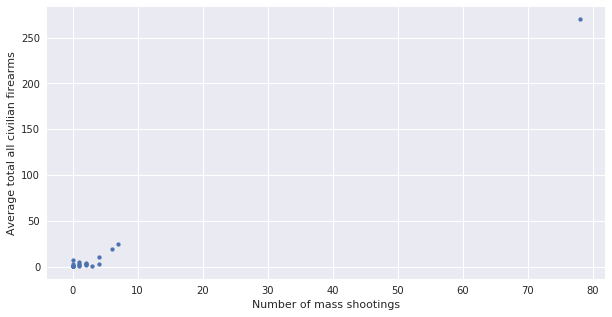

In [182]:
#without errors
fig = plt.figure(figsize=(10,5)) 
ax2 = fig.add_subplot(111)

scatter2 = ax2.scatter(df_['Number of mass shootings'], df_['Average total all civilian firearms']/ 1e6,s=15)

ax2.set_xlabel("Number of mass shootings")
ax2.set_ylabel("Average total all civilian firearms")
ax2.set_ylim()
plt.show()

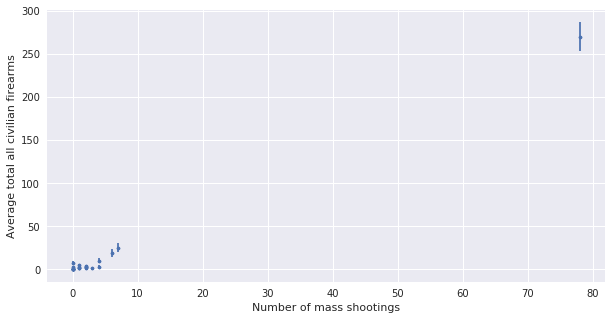

In [184]:
#with errors
fig = plt.figure(figsize=(10,5)) 
ax2 = fig.add_subplot(111)

scatter2 = ax2.scatter(df_['Number of mass shootings'], df_['Average total all civilian firearms']/ 1e6,s=10)
ax2.errorbar(df_['Number of mass shootings'], df_['Average total all civilian firearms']/ 1e6, 
            yerr = np.sqrt(df_['Average total all civilian firearms'] / 1e6), fmt = '.')
ax2.set_xlabel("Number of mass shootings")
ax2.set_ylabel("Average total all civilian firearms")
ax2.set_ylim()
plt.show()

# Modeling

## fit a line to the Number of mass shootings  per person as a function of Average total all civilian firearms per person. 
Before you do it it is a good idea to make sure that both quantities are roughly of the same order of magnitude (unity). (You can simply divide by the order of magnitude of the mean of the sample to obtain this). Use

    - statsmodels OLS
    - statsmodels WLS
    - seaborn
    - choose one of
        -- creating a function that calculates the residuals and minimizing that function
        -- analytical solution http://mathworld.wolfram.com/LeastSquaresFitting.html
        -- numpy.polyfit() - https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.polyfit.html
    

WLS: that is the weighted square fit. The statsmodel package WLS function allows you to take the uncertainties of each data point into account when you fit your model. It takes the parameter weights, which is the inverse of your errors:
weights = 1.0/df.yerror
Notice that 
    a - sqrt(0) = 0
    b - 1/0 = infinity
    c - you cannot have weight that are infinity in your fit. Please come up with a solution and justify it.


the latter three you can learn about in this example: https://github.com/fedhere/PUI2017_fb55/blob/master/Lab5_fb55/genderIncomeBias.ipynb
Since we did not discuss these, I will add some notes to the repo in the afternoon.

Use the seaborn python package built in regression function  to plot the regression confidence intervals. 

import seaborn  as sns
sns.regplot(x="x", y="y", data=df);




In [132]:
df_.columns

Index([u'Country Name', u'pop', u'gdp', u'Number of homicides by firearm',
       u'Average total all civilian firearms', u'Country',
       u'Guns per 100 inhabitants', u'Number of mass shootings',
       u'shootingspp'],
      dtype='object')

In [219]:
df_['shootingspp'] = df_["Number of mass shootings"] / df_['pop'] * 1e6

In [220]:
df_['armspp'] = df_["Average total all civilian firearms"] / df_['pop'] 

In [221]:
df_.columns

Index([u'Country Name', u'pop', u'gdp', u'Number of homicides by firearm',
       u'Average total all civilian firearms', u'Country',
       u'Guns per 100 inhabitants', u'Number of mass shootings',
       u'shootingspp', u'firearm', u'hofirearm', u'armspp', u'magMassShootpp',
       u'magarmspp'],
      dtype='object')

In [222]:
df_['magMassShootpp'] = df_['shootingspp']/df_['shootingspp'].mean()
df_['magarmspp'] =df_['armspp']/df_['armspp'].mean()

In [223]:
df_.head()

,Country Name,pop,gdp,Number of homicides by firearm,Average total all civilian firearms,Country,Guns per 100 inhabitants,Number of mass shootings,shootingspp,firearm,hofirearm,armspp,magMassShootpp,magarmspp
0,Australia,22742475.0,1.543411e+12,30.0,3050000.0,Australia,15.0,4,0.175882,134.110294,0.001319,0.134110,1.423355,0.593366
1,Austria,8429991.0,4.094252e+11,18.0,2500000.0,Austria,30.4,1,0.118624,296.560222,0.002135,0.296560,0.959983,1.312121
2,Belgium,11128246.0,4.978842e+11,70.0,1800000.0,Belgium,17.2,2,0.179723,161.750558,0.006290,0.161751,1.454434,0.715660
3,Canada,34750545.0,1.824289e+12,173.0,9950000.0,Canada,30.8,4,0.115106,286.326445,0.004978,0.286326,0.931514,1.266842
4,Switzerland,7996861.0,6.680436e+11,57.0,3400000.0,Switzerland,45.7,2,0.250098,425.166825,0.007128,0.425167,2.023957,1.881136


## OLS Model

In [250]:
# OLS 
smfit = sm.OLS(df_['shootingspp'], sm.add_constant(df_['armspp'])).fit()
smfit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            shootingspp   R-squared:                       0.192
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     4.981
Date:                Wed, 14 Nov 2018   Prob (F-statistic):             0.0367
Time:                        21:32:49   Log-Likelihood:                 12.284
No. Observations:                  23   AIC:                            -20.57
Df Residuals:                      21   BIC:                            -18.30
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.0368      0.050      0.742      0.467        -0.066     0.140
armspp         0.3837      0.172      2.232      0.037         0.026     0.741
==============================================================================
Omnibus:                       34.558   Durbin-Watson:                   1.860
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               88.760
Skew:                           2.666   Prob(JB):                     5.32e-20
Kurtosis:                      11.012   Cond. No.                         5.85
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## WLS Model

In [246]:
x = np.array(df_['armspp'])
y = np.array(df_['shootingspp'])
smfitw = sm.WLS(y,x,weights=list(1/np.sqrt(x))).fit()

In [247]:
smfitw.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.450
Model:                            WLS   Adj. R-squared:                  0.425
Method:                 Least Squares   F-statistic:                     17.98
Date:                Wed, 14 Nov 2018   Prob (F-statistic):           0.000335
Time:                        21:31:57   Log-Likelihood:                 14.303
No. Observations:                  23   AIC:                            -26.61
Df Residuals:                      22   BIC:                            -25.47
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.5206      0.123      4.240      0.000         0.266     0.775
==============================================================================
Omnibus:                       35.438   Durbin-Watson:                   1.808
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               96.435
Skew:                           2.704   Prob(JB):                     1.15e-21
Kurtosis:                      11.448   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

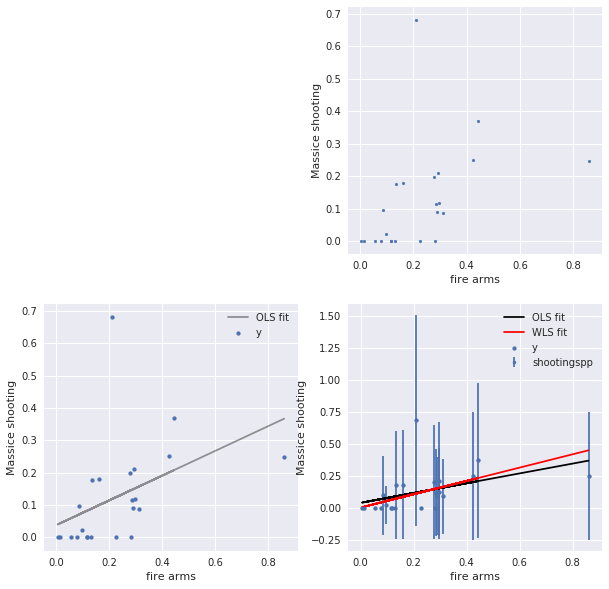

In [261]:
fig = plt.figure(figsize=(10,10)) 
ax = fig.add_subplot(222)

scatter = ax.scatter(df_['armspp'], df_['shootingspp'],s=8)
ax.set_xlabel("fire arms")
ax.set_ylabel("Massice shooting")
ax.set_ylim()

ax = fig.add_subplot(223)
scatter = ax.scatter(df_['armspp'], df_['shootingspp'],s=15, label = "y")
ax.plot(df_['armspp'], smfit.fittedvalues, 'k', alpha=0.4, label = "OLS fit")
ax.set_xlabel("fire arms")
ax.set_ylabel("Massice shooting")
ax.set_ylim()
ax.legend()


ax = fig.add_subplot(224)
scatter = ax.scatter(df_['armspp'], df_['shootingspp'],s=15, label = "y")
ax.errorbar(df_['armspp'], df_['shootingspp'], 
            yerr = np.sqrt(df_['shootingspp'] * 1.0), fmt = '.')
ax.plot(df_['armspp'], smfit.fittedvalues, 'k',label = "OLS fit", color="black")
ax.plot(df_['armspp'], smfitw.fittedvalues, 'k',  label = "WLS fit", color="red")
ax.set_xlabel("fire arms")
ax.set_ylabel("Massice shooting")
ax.set_ylim()
ax.legend()

plt.show()

## Outlier removal:
The concept of outlier is actually rather sophisticated: a point can be an outlier in a context but not in another. If you want to remove outliers and try different fits, here is some info on how to remove data efficiently from a dataset 
    https://gist.github.com/fedhere/89db40a3c9a28335bf5a35d52a52c595

## Extra credit: calculate the confidence interval by hand and also plot them 
you can use pylab.fill_between(x, yfit - ci, yfit + ci, alpha=0.5)

**Confidence intervals: **
there are three type of intervals in a linear regression, plot any one of them all three if you want - how do they compare to the seaborn plot?:

1) Confidence intervals for the parameters slope and intercept

2) Confidence interval for the average y value

3) Prediction interval for a single y value

1) __confidence interval of the  model parameters slope and intercept:__
define sigma as the sum of the residuals over the square root of number n of observations. 

sigma: σ̂ =sqrt(Sum((Yoberved_i−Ypredicted_i)^2)/n)

where the sum is over all observations

Define t_alpha/2,n-2 the t statistics at (1-alpha/2) for a t distribution with n-2 degrees of freedom (you can calculate it with scipy
tp = sp.stats.t.ppf(0.975, n-2)



2) **A confidence interval for E(y | x) , the expected (average) value of y for a given x_**

define s: residual standard error sy = sqrt(Sum((y_observed-y_predicted)^2)/(n-2))

(note: n-2 is the degrees of freedom of the problem: observations - number of parameters - 1)

the confidence interval for a given y(x*) is: 

y_predicted(x*) +/- t_(alpha/2)(n-2) * sy * sqrt( 1/n + (x* - mean(x)^2) / sum((x* - mean(x)^2)

3) **Confidence intervals for average y (predicted) values**

y_predicted(x*) +/- t_(n-2) * sy * sqrt( 1 + 1/n + (x* - mean(x)^2) / sum((x* - mean(x)^2)

very similar, but note the +1 in the square root

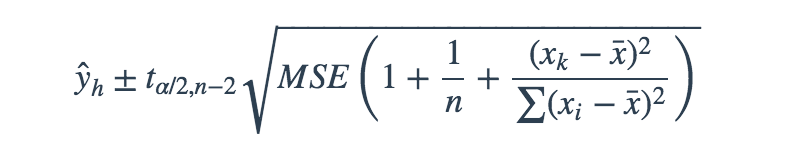

In [32]:
from IPython.display import Image
Image(filename="../Lab5_fb55/ciYaverage.png")

In [269]:
import numpy as np
import scipy.stats

In [273]:
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

In [276]:
x = np.array(df_['armspp'])
y = np.array(df_['shootingspp'])
data = y

In [277]:
mean_confidence_interval(data, confidence=0.95)

(0.12356888832925393, 0.053808941290454645, 0.19332883536805323)

In [282]:
pl.figure()
import seaborn  as sns
sns.regplot(x="x", y="y", data= data);

pl.ylabel("Mass shootings")
pl.xlabel("Fire arms");

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

## Use the stsatsmodels.gaphics package to plot the influence plot. 
Read the package documentation to learn how to read this plot and extract the countries with the highest influence

This is the topic of this week's assigned reading, so make sure you do the reading before you do this step. It will help you interpret the plot.

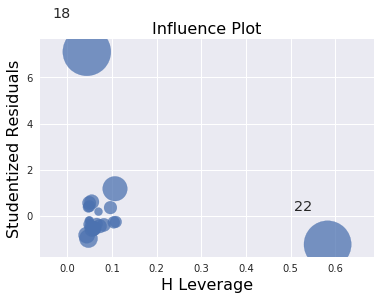

In [283]:
sm.graphics.influence_plot(smfit, alpha  = 0.05, criterion="cooks");

## Extra credit: calculate from scratch the stanrdardized residuals and the H leverage for the WLS model and discuss if there are any differences

## Discuss your findings